<a href="https://colab.research.google.com/github/pboric/Project-4/blob/main/Mental_Health_in_the_Tech_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents

>[Introduction](#scrollTo=dKSZuwau0stj)

>[Navigating the Tech Industry: A Reality Check](#scrollTo=XBX8OfosRFLf)

>[Gender Disparities in Tech and STEM: A Persistent Challenge](#scrollTo=W4uB2BseRFLh)

>>>[Analyzing Gender Participation: A Numerical Perspective](#scrollTo=mNupLnclRFLi)

>>>[Analyzing Survey Participation Trends](#scrollTo=0E1xI9YURFLi)

>[Exploring Participant Ages in the Survey](#scrollTo=ootDFw4xRFLi)

>>>[Analyzing Age Distribution Trends](#scrollTo=WEmCnpECRFLj)

>[Survey Participation by Country](#scrollTo=DIdl9UfURFLj)

>>>[Selective Visualization of Global Survey Data](#scrollTo=hkfis13ZRFLj)

>[Treatment Seeking Behavior in Tech Industry](#scrollTo=7GR0gLsXRFLj)

>>>[Analyzing the Willingness to Pursue Mental Health Treatment](#scrollTo=SwslUiCJRFLk)

>[Corporate Employment and Mental Health](#scrollTo=XG4Rht35RFLk)

>>>[Examining Diagnosis Rates Among the Workforce](#scrollTo=VtQZgajBRFLk)

>[Comprehensive Analysis of Employment and Mental Health Diagnoses](#scrollTo=JPFOoOdZRFLl)

>>>[Employment Status and Diagnosis Data Visualization](#scrollTo=IhlmTyl1RFLo)

>>>[Analysis of Correlation Between Enterprise Employment and Mental Health Diagnoses Using Seaborn](#scrollTo=N9P9nBOHRFLo)

>[Conclusion](#scrollTo=DwHGC3LcRFLp)

>[Suggestions on the improvement of the analysis](#scrollTo=bHDYokmE0D5M)



# Introduction

Analyse the Mental Health in the Tech Industry Dataset. Apply all that you have learned about SQL, Statistics, and Data Analysis to complete this task. Expectation is that you'll use your own judgement how to perform the analysis and how to select the most important avenues of exploration.

# Navigating the Tech Industry: A Reality Check

The tech industry often appears as a picturesque realm, where sunshine and rainbows abound. In this idyllic setting, geeks and nerds hunch over dimly lit screens, conjuring magic with green text—transforming heaps of data into meaningful insights with a few keystrokes.

However, this portrayal diverges significantly from reality. The tech world operates at breakneck speed, where answers are demanded before problems are fully articulated. Clients seek fully-fledged software solutions without precisely defining their requirements.

Amid this frenzy, pressure mounts to deliver flawless, production-ready work. Agile, peer programming, and Extreme Programming (XP) methodologies add to the strain. Tech professionals find themselves under unprecedented stress.

Disturbingly, mental health issues plague the industry. According to OSMI data, 51% of tech professionals have been diagnosed with mental health conditions—far surpassing the 19.1% rate among U.S. adults. Entrepreneurship exacerbates this: founders are 2x more likely to suffer from depression, 6x more likely to have ADHD, and 10x more likely to battle bipolar disorder. These struggles remain hidden, making it challenging to recognize when help is needed.

Remember, behind the screens lies a private struggle—one that deserves empathy and support.

In [28]:
# @title
# Imports

import pprint
import sqlite3
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots

In [29]:
# @title
# Connect to dataset and form dataFrames to run analytics on

con = sqlite3.connect("/content/mental_health.sqlite")

questions_df = pd.read_sql_query("SELECT * from Question", con)

answers_df = pd.read_sql_query("SELECT * from Answer", con)
answers_df.columns = ['AnswerText', 'SurveyID',	'UserID', 'questionid']

surveys_df = pd.read_sql_query("SELECT * from Survey", con)
display(surveys_df)

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [30]:
# @title
# Form a singular df with all present Q&As
qa = pd.merge(answers_df, questions_df, how='left', on='questionid')
display(qa)

,AnswerText,SurveyID,UserID,questionid,questiontext
0,37,2014,1,1,What is your age?
1,44,2014,2,1,What is your age?
2,32,2014,3,1,What is your age?
3,31,2014,4,1,What is your age?
4,31,2014,5,1,What is your age?
...,...,...,...,...,...
236893,Other,2016,2689,117,Which of the following best describes your wor...
236894,Support,2016,2690,117,Which of the following best describes your wor...
236895,Back-end Developer,2016,2691,117,Which of the following best describes your wor...
236896,DevOps/SysAdmin,2016,2692,117,Which of the following best describes your wor...


In [31]:
# @title
# Get a list of all survey years
survey_years = list(surveys_df["SurveyID"])

# Gender Disparities in Tech and STEM: A Persistent Challenge

The tech and STEM fields have long been dominated by men. Despite corporate efforts to encourage female participation through CSR activities, the gender ratio remains stubbornly imbalanced.

Consider this: out of 100 FTSE companies, a mere 7 are led by women. Similarly, within the Fortune 500 companies, there are only 38 women CEOs.

In the following section, we delve into this complex issue using survey data. Beyond the binary labels of ‘male’ and ‘female’, we explore how gender roles have evolved over time. Our analysis reveals both progress and persistent challenges.

In [32]:
# @title
gender_through_years = qa.query("questionid == 2")
# gender_through_years.groupby("UserID")
# display(gender_through_years)

In [33]:
# @title
temp_groupby = None
gender_distribution = \
{
    "male": [0, 0, 0, 0, 0],
    "female": [0, 0, 0, 0, 0],
    "transgender": [0, 0, 0, 0, 0],
    "non_binary": [0, 0, 0, 0, 0],
    "queer": [0, 0, 0, 0, 0],
    "gender_fluid": [0, 0, 0, 0, 0],
    "other": [0, 0, 0, 0, 0]
}


for idx, year in enumerate(surveys_df["SurveyID"]):
    temp = gender_through_years[gender_through_years["SurveyID"] == year]
    temp_groupby = temp.groupby('AnswerText').count()
#     display(temp_groupby)

    for answer, row in temp_groupby.iterrows():
#         print((answer), type(row[1]))
        if "trans" in answer.lower() or "ftm" in answer.lower() or "mtf" in answer.lower():                     # Using short forms to catch all cases.
#             print("Transgender: ", answer)
            gender_distribution["transgender"][idx] = gender_distribution["transgender"][idx] + row[1]
        elif "fluid" in answer.lower():
#             print("Gender-fluid: ", answer)
            gender_distribution["gender_fluid"][idx] = gender_distribution["gender_fluid"][idx] + row[1]
        elif "female" in answer.lower() or "she" in answer.lower() or "femina" in answer.lower():
#             print("Female: ", answer)
            gender_distribution["female"][idx] = gender_distribution["female"][idx] + row[1]
        elif ("non" in answer.lower() and "binary" in answer.lower()) or "nb" in answer.lower():
#             print("Non-binary: ", answer)
            gender_distribution["non_binary"][idx] = gender_distribution["non_binary"][idx] + row[1]
        elif "queer" in answer.lower():
#             print("Queer: ", answer)
            gender_distribution["queer"][idx] = gender_distribution["queer"][idx] + row[1]
        elif "male" in answer.lower() or "guy" in answer.lower() or "swm" in answer.lower() or "masculino" in answer.lower():
#             print("Male: ", answer)
            gender_distribution["male"][idx] = gender_distribution["male"][idx] + row[1]
        else:
#             print("Other: ", answer)
            gender_distribution["other"][idx] = gender_distribution["other"][idx] + row[1]
#     print("---------------------------------------------------------")

### Analyzing Gender Participation: A Numerical Perspective

Before we delve into plotting the graph, let’s examine the raw numbers that form its foundation.

Each row represents the top genders, manually selected.
Within each row, you’ll find a list of numbers corresponding to the total participants of that gender who took the survey in the following years: 2014, 2016, 2017, 2018, and 2019.
These figures provide essential context for our subsequent analysis.

In [34]:
# @title
print(f"Gender distribution: \n")
pprint.pprint(gender_distribution)

Gender distribution: 

{'female': [248, 340, 219, 128, 100],
 'gender_fluid': [1, 3, 2, 2, 1],
 'male': [996, 1057, 504, 269, 228],
 'non_binary': [2, 8, 8, 5, 4],
 'other': [7, 15, 19, 7, 16],
 'queer': [2, 5, 2, 2, 0],
 'transgender': [4, 5, 2, 4, 3]}


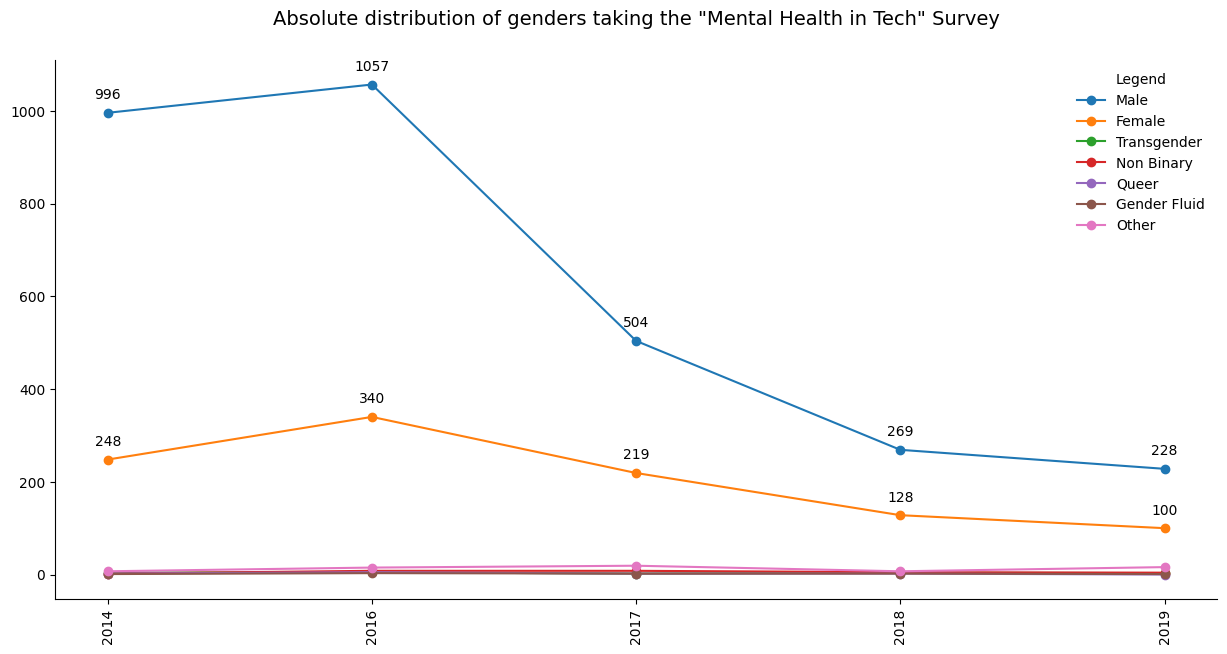

In [35]:
# @title
plt.figure(figsize=(15,7))
for key in gender_distribution.keys():
    plt.plot(gender_distribution.get(key), "o-", label=key.title().replace("_", " "))
    if key == "male" or key == "female":  # Annotating points only for male and female as the other numbers are very less
        for x in range(len(survey_years)):
            plt.annotate(gender_distribution.get(key)[x],  # this is the text
                         (x, gender_distribution.get(key)[x]),  # these are the coordinates to position the label
                         textcoords="offset points",  # how to position the text
                         xytext=(0, 10),  # distance from text to points (x,y)
                         ha='center')  # horizontal alignment can be left, right, or center

plt.legend(title="Legend", frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(range(len(survey_years)), survey_years, rotation=90)
plt.title(label="Absolute distribution of genders taking the \"Mental Health in Tech\" Survey",
          fontsize=14,
          y=1.05
         )
plt.show()

### Analyzing Survey Participation Trends

In the graph above, we observe significant fluctuations in the total number of participants over the years. The majority of participants are male. Meanwhile, the number of women taking the survey remains relatively constant. However, individuals identifying with other genders constitute a small proportion, and their participation remains consistently low throughout the entire time period.

These trends highlight the need for continued efforts to promote diversity and inclusion within the survey population.

# Exploring Participant Ages in the Survey
We attempted to extract information about the ages of survey participants, including details such as the youngest, oldest, and median ages.

However, the data provided was unclean, making it challenging to derive meaningful insights. For instance, we observed that user entered a maximum age of 329, which seems highly improbable. Similarly, the minimum age entered was -29, which is equally difficult to accept. This underscores the importance of implementing end-user validation.

In [36]:
# @title
age_group = qa.query("questionid == 1")[["SurveyID", "AnswerText"]]
print("-"*50, "\nBefore Filtering\n", "-"*50, sep="")
print(f"Minimum age: ", age_group["AnswerText"].astype("int").min())
print(f"Maximum age: ", age_group["AnswerText"].astype("int").max())
print(f"Mean age: ", round(age_group["AnswerText"].astype("int").mean(), 2))
print(f"Median age: ", age_group["AnswerText"].astype("int").median())
print()

x = age_group[(age_group.SurveyID == year) & \
                               (age_group.AnswerText.astype("int") >= 15) & \
                               (age_group.AnswerText.astype("int") <= 90)]
print("-"*50, "\nAfter Filtering\n", "-"*50, sep="")
print(f"Minimum age: ", x["AnswerText"].astype("int").min())
print(f"Maximum age: ", x["AnswerText"].astype("int").max())
print(f"Mean age: ", round(x["AnswerText"].astype("int").mean(), 2))
print(f"Median age: ", x["AnswerText"].astype("int").median())

--------------------------------------------------
Before Filtering
--------------------------------------------------
Minimum age:  -29
Maximum age:  329
Mean age:  33.92
Median age:  33.0

--------------------------------------------------
After Filtering
--------------------------------------------------
Minimum age:  19
Maximum age:  64
Mean age:  35.6
Median age:  34.0


### Analyzing Age Distribution Trends

Despite fluctuations in the maximum and minimum ages, the median and mean ages remain relatively stable, albeit shifting slightly to the right.

Next, we’ll create charts to visualize the age distribution over different years.

Text(0.5, 0.98, 'Age Distribution of Participants Taking The Survey')

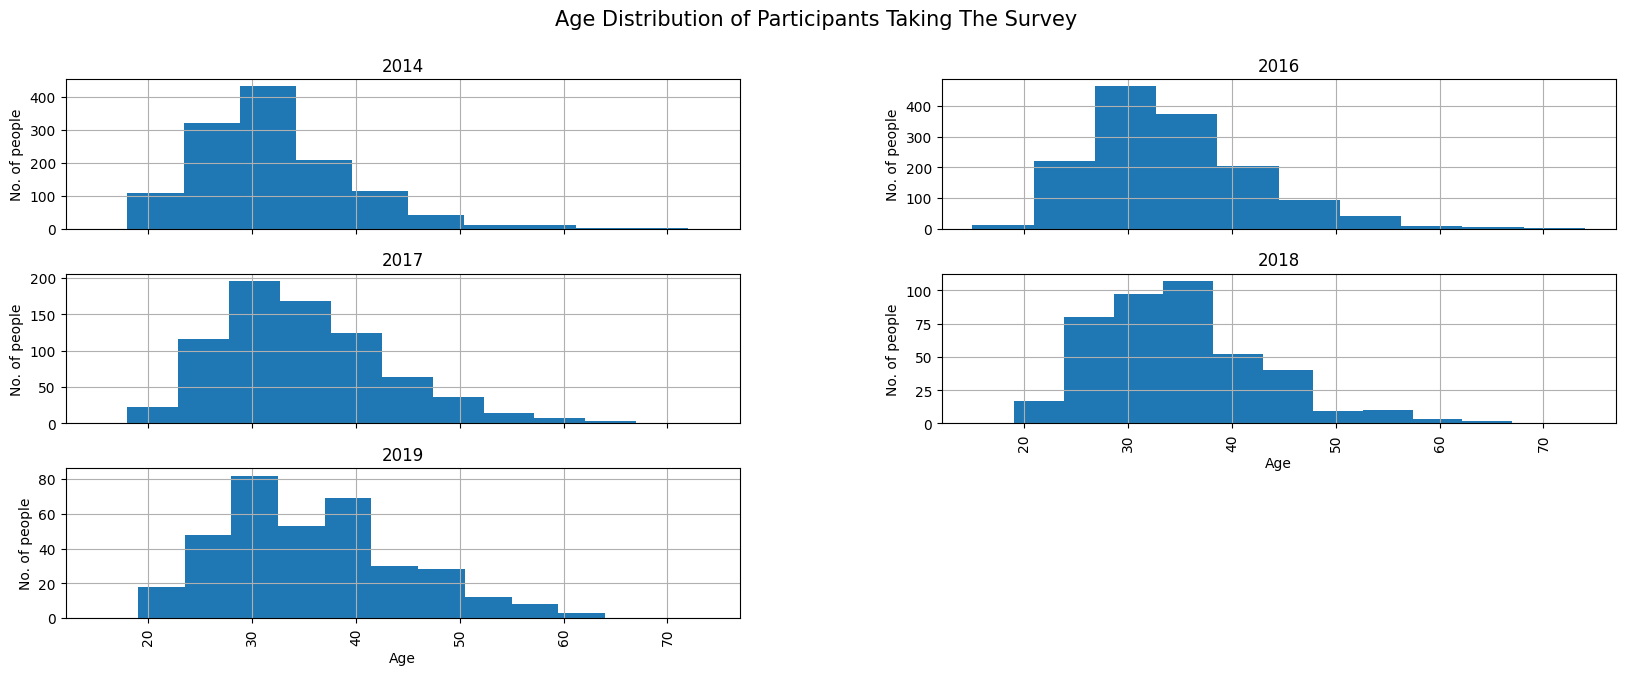

In [37]:
# @title
age_group = qa.query("questionid == 1")[["SurveyID", "AnswerText"]]
age_dict = {}

for year in survey_years:
#     print("Working with year: ", year)
    age_dict[year] = age_group[(age_group.SurveyID == year) & \
                               (age_group.AnswerText.astype("int") >= 15) & \
                               (age_group.AnswerText.astype("int") <= 90)] \
                        .AnswerText \
                        .astype("int") \
                        .sort_values() \
                        .tolist()

axarr = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in age_dict.items() ])) \
        .hist(
            figsize=(20,7),
            xrot=90,sharex=True
        )
for ax in axarr.flatten():
    ax.set_xlabel("Age")
    ax.set_ylabel("No. of people")

plt.suptitle("Age Distribution of Participants Taking The Survey", fontsize=15)

# Survey Participation by Country
The Mental Health in Tech Survey garnered international participation, with numerous countries contributing. Over a span of six years, we’ve seen involvement from a total of 80 countries. The level of participation varied significantly, with some countries having a substantial number of respondents and others having relatively few.

The following table lists the top 5 and bottom 5 countries in terms of survey participation.

In [38]:
# @title
country_df = qa.query("questionid == 3")[["SurveyID", "AnswerText"]]
# country_df

country_dict = {}

for year in survey_years:
#     print("Working with year: ", year)
    year_country_df = country_df[(country_df.SurveyID == year)]
    value_counts = year_country_df.value_counts()
    temp_dict = {}

    for country_name, country_no in zip(value_counts.index, value_counts):
        country_name = country_name[1]  ## Subscript [1] is used to deal with the multi index part. Print the following to understand better: 'year_country_df.value_counts().index'

        # Handle USA separately since the name changed in the survey and both the values are present in the answer
        if country_name == "United States" or  country_name == "United States of America":
            temp_dict["USA"] = int(country_no)

        else:
            temp_dict[country_name] = int(country_no)

    country_dict[year] = temp_dict
#     break

country_df = pd.DataFrame(country_dict)
display(country_df)

,2014,2016,2017,2018,2019
USA,751.0,840.0,497.0,312.0,204.0
United Kingdom,185.0,180.0,66.0,19.0,32.0
Canada,72.0,78.0,26.0,8.0,15.0
Germany,45.0,58.0,22.0,7.0,4.0
Netherlands,27.0,48.0,14.0,5.0,4.0
...,...,...,...,...,...
Mauritius,NaN,NaN,NaN,1.0,NaN
Macedonia,NaN,NaN,NaN,1.0,NaN
Hong Kong,NaN,NaN,NaN,1.0,1.0
Ethiopia,NaN,NaN,NaN,1.0,NaN


### Selective Visualization of Global Survey Data

Due to the overwhelming amount of data from numerous countries, creating a graph that includes all would result in a cluttered and illegible visual. Therefore, we opted to represent only the top 5 countries for each year. The graphs below illustrate this selective data representation.

When you hover over the entries in the graph, a tooltip appears, showing the name of the country along with the count of participants for that particular year.

In [39]:
# @title
for column in country_df.columns:
#     print("Working with column: ", column)
    count_df = country_df[column] \
                .sort_values(ascending=False) \
#                 .head(5)
    count_df_others_sum = count_df[6:].sum()
    temp_df = count_df.head(5)
    temp_df.loc["Others"] = count_df_others_sum
#     print(temp_df)

    fig = px.pie(temp_df,
            values=column,
            names=temp_df.index,
            title="Top 5 countries taking the survey "+str(column),
            labels={
                "index":"Country"
            })
    fig.update_traces(textposition='inside', textinfo='percent+label')
#     fig.write_image("./Top 5 countries taking the survey every year_"+str(column)+".png")

    fig.update_layout(template="plotly_white")
    fig.show()

# Treatment Seeking Behavior in Tech Industry

The reluctance to seek mental health treatment, exacerbated by societal stigma and the ostracization of diagnosed individuals, is prevalent. This trend is notably more pronounced in certain Asian countries.

Approximately one in eight adults (12.1%) undergoes mental health treatment, encompassing 10.4% who are on medication and 3% who partake in psychological therapy. The intersection of these figures is attributed to the 1.3% who report receiving both forms of treatment.

Among individuals with prevalent mental health issues, 36.2% have sought treatment. There has been a marked increase in the usage of mental health services among this demographic. In 2000, roughly one in four individuals aged 16–74 with symptoms of common mental health conditions were in treatment (23.1%), a figure that rose slightly in 2007 (24.4%). By 2014, the rate had escalated to over one in three (37.3%), indicating a significant uptick in treatment engagement (refer to the chart below).

In [ ]:
# @title
seek_help_yoy = qa.query("questionid == 7")
# seek_help_yoy

In [41]:
# @title
percent_yoy = []
tot_yoy = []
for year in survey_years:
    tmp = seek_help_yoy[(seek_help_yoy.SurveyID == year)][["AnswerText", "UserID", "SurveyID"]]
    tmp2 = tmp.AnswerText.value_counts()

    percent_yoy.append((tmp2.loc["1"] / (tmp2.loc["1"]+tmp2.loc["0"])) * 100)    # Percentage of participant each year who seeked help
    tot_yoy.append((tmp2.loc["1"]+tmp2.loc["0"]))                                # Total no.  of participant each year who took part
#     display(tmp2)

In [42]:
# @title
# fig = px.line(x=survey_years, y=percent_yoy,
#              labels=dict(x="Year", y="% people seeking help", color="Time Period"))
# # fig.update_traces(textposition='inside')
# fig.add_bar(x=survey_years, y=percent_yoy, name="% people seeking help")
# fig.update_layout(title_text="% of participants seeking help YoY")
# fig.update_layout(showlegend=False)
# fig.show()

### Analyzing the Willingness to Pursue Mental Health Treatment

The chart presented below delves into the willingness of individuals to seek mental health treatment. The blue line represents those who have sought help, while the red line provides a comparative baseline, indicating the total number of survey participants.

It’s noted that over time, the percentage of participants seeking help for mental health issues has risen, despite a decrease in the overall number of survey respondents. A potential reason for this trend could be that as the total participant count diminishes, the relative percentage of those seeking help naturally appears to increase. With adequate data, this hypothesis could be either confirmed or refuted.

In [51]:
# @title
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=survey_years, y=percent_yoy, name="% of participants seeking help"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=survey_years, y=tot_yoy, name="No. of participants"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Percent of participants seeking help YoY",
    template="plotly_white"
)

# Set x-axis title
fig.update_xaxes(title_text="Survey Year")

# Set y-axes titles
fig.update_yaxes(title_text="% of participants seeking help", secondary_y=False)
fig.update_yaxes(title_text="No. of participants", secondary_y=True)

fig.show()

# Corporate Employment and Mental Health

The prevailing assumption is that corporate employees are at a higher risk of experiencing mental health problems. In the following section, we scrutinize this belief. Is there a correlation between corporate employment and an increased incidence of mental health issues? For the purpose of this analysis, we have not differentiated between enterprise sizes, though this aspect may be addressed in future discussions.

In [44]:
# @title
employment_df = qa.query("questionid == 5")[["AnswerText", "UserID"]].set_index('UserID')
employment_df = employment_df[employment_df['AnswerText'] != '-1']
# display(employment_df)
# type(employment_df)
# display(employment_df.describe(include='all'))
# display(employment_df.value_counts())

print(f"How many total people work in an enterprise: {employment_df.value_counts()[0]}")
print(f"How many total people are self employed: {employment_df.value_counts()[1]}")

How many total people work in an enterprise: 3550
How many total people are self employed: 650


### Examining Diagnosis Rates Among the Workforce

Observing that a majority are employed by enterprises, it becomes evident that the data is skewed.

The subsequent analysis will focus on determining the prevalence of diagnosed mental health conditions within the population.

In [45]:
# @title
diagnosed_df = qa.query("questionid == 34")[["AnswerText", "UserID"]].set_index('UserID')
diagnosed_df = diagnosed_df[diagnosed_df['AnswerText'] != '-1']                                # Only consider Yes/No answers
# display(diagnosed_df)
# display(diagnosed_df.describe())
# display(diagnosed_df.value_counts())


print(f"No. of people diagnosed with a mental health illness: {diagnosed_df.value_counts()[0]}")
print(f"No. of people NOT diagnosed with a mental health illness: {diagnosed_df.value_counts()[1]}")

No. of people diagnosed with a mental health illness: 1363
No. of people NOT diagnosed with a mental health illness: 732


The data reveals that the number of individuals diagnosed with a mental health condition is nearly twice as high as those without a diagnosis. This significant discrepancy highlights the prevalence of mental health issues within the surveyed group

In [46]:
# @title
# Join employment with diagnosed and group by on employment
emp_diag_join = employment_df.join(diagnosed_df,
                     on="UserID",
                     how="inner",
                     lsuffix="_employment",
                     rsuffix='_diagnosed')
# Drop the index
emp_diag_join.reset_index(drop=True, inplace=True)

# Comprehensive Analysis of Employment and Mental Health Diagnoses

We will proceed to compile and analyze the various scenarios involving individuals who are either employed by a corporate enterprise or have been diagnosed with a mental health condition, as well as those who fall into both categories. This will provide a holistic view of the intersection between employment type and mental health status.

In [47]:
# @title
# Separate all the values
corp_diag = emp_diag_join.value_counts()[0]
print(f"Enterprise and diagnosed: {corp_diag}")

corp_notdiag = emp_diag_join.value_counts()[1]
print(f"Enterprise and not diagnosed: {corp_notdiag}")

self_diag = emp_diag_join.value_counts()[2]
print(f"Self employed and diagnosed: {self_diag}")

self_notdiag = emp_diag_join.value_counts()[3]
print(f"Self employed and not diagnosed: {self_notdiag}")

Enterprise and diagnosed: 1128
Enterprise and not diagnosed: 591
Self employed and diagnosed: 235
Self employed and not diagnosed: 141


### Employment Status and Diagnosis Data Visualization

To conclude this analysis, we display the data on a chart with the x-axis indicating employment status at an enterprise. The y-axis shows the cumulative count of individuals, categorized by diagnosis status, to enhance our visualization of the overall figures.

In [48]:
# @title
fig = px.bar([[corp_diag, corp_notdiag], [self_diag, self_notdiag]],
            labels={
                "variable":"Diagnosed",
                "value":"Count",
                "index":"Self employed?"
            })

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1],
        ticktext = ['Working at a corporate', 'Self employed']
    ),
    title="Does working in a corporate cause more mental health issues?",
    xaxis_title="",
    yaxis_title="Count",

    template="plotly_white"
)

fig.update_layout(showlegend=False)
fig.show()

### Analysis of Correlation Between Enterprise Employment and Mental Health Diagnoses Using Seaborn

In the final part of our analysis, we utilize Seaborn to create a correlation matrix. This is to examine the potential relationship between employment at an enterprise and the incidence of mental health diagnoses. According to the data set, no correlation exists.

In [49]:
# @title
px.imshow(emp_diag_join.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1))

# Conclusion

- The exploration of the tech industry and its intersection with mental health reveals a complex landscape. While the industry is often idealized, the reality is a high-pressure environment that can exacerbate mental health issues. The data underscores the prevalence of these issues within the industry, with a significant proportion of tech professionals diagnosed with mental health conditions.

- The gender disparities in tech and STEM fields persist, despite efforts to encourage female participation. The analysis of survey data shows a stubborn imbalance in gender representation, with a majority of participants being male.

- The examination of survey participation trends, participant ages, and participation by country provides a comprehensive overview of the demographics of the tech industry. However, the data also highlights the challenges in deriving meaningful insights due to unclean data and the need for end-user validation.

- The analysis of treatment-seeking behavior in the tech industry reveals a reluctance to seek help, often exacerbated by societal stigma. However, there has been a marked increase in the usage of mental health services among individuals with prevalent mental health issues.

- The exploration of corporate employment and mental health diagnoses shows a higher prevalence of diagnosed mental health conditions among those employed by enterprises. However, the correlation analysis indicates no significant relationship between enterprise employment and the incidence of mental health diagnoses.

In conclusion, this comprehensive analysis provides valuable insights into the realities of the tech industry, highlighting the importance of mental health awareness, the need for diversity and inclusion, and the challenges in data analysis. It underscores the need for continued efforts to address these issues and create a more inclusive and supportive environment in the tech industry.


# Suggestions on the improvement of the analysis

- Data Validation: The analysis mentions instances of unclean data, such as improbable ages. Implementing stricter data validation measures during the data collection process can help ensure the reliability of the data.

- Detailed Demographics: The analysis could benefit from a more detailed breakdown of demographics. For instance, age and gender distributions within each employment type (corporate or self-employed) could provide more nuanced insights.

- Longitudinal Analysis: The analysis mentions fluctuations in survey participation over the years. A longitudinal analysis, tracking the same participants over time, could help distinguish between real changes and artifacts of different population samples.

- Correlation vs Causation: The analysis finds no correlation between enterprise employment and incidence of mental health diagnoses. However, it's important to remember that correlation does not imply causation. Even if a correlation were found, it would not necessarily mean that one factor causes the other.

- Expand Scope: The analysis focuses on the tech industry. Expanding the scope to include other industries could provide a more comprehensive view of mental health in the workplace.

- Qualitative Data: The analysis is largely quantitative. Incorporating qualitative data, such as interviews or open-ended survey responses, could provide additional context and insights.

- Mental Health Resources: Given the high prevalence of mental health issues found in the analysis, it could be beneficial to provide information on mental health resources, such as counseling services or hotlines, as part of the discussion.

- Further Research: The analysis could suggest areas for further research. For example, exploring why certain demographics are more likely to seek treatment or how workplace policies impact mental health.